# Group 2. Diterpene project

## Ege Yolsal, Andrei Brasoveanu, Darius Gražulis
### 01634257, 12045444, 12045116

In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import tree

In [4]:
df = pd.read_csv("diterpene_shuf.csv")

For our practical coursework assignment, you will be working on a problem in natural product chemistry. More precisely, we provide you with a dataset comprising nuclear magnetic resonance (NMR) spectroscopy data for a certain set of organic compounds, so-called diterpenes. Diterpenes belong to the class of terpenes, which are molecules with a carbon skeleton and the formula (C5H8)n. They constitute a major component of essential oils in certain plants and often exhibit interesting medical properties. NMR spectroscopy is a commonly employed method to determine the chemical structure of a compound, something that is referred to as structure elucidation. In NMR experiments, molecules are placed in a strong magnetic field, resulting in the molecules resonating at a specific frequency. These frequencies can then be used to infer information about the molecules' chemical structures. The full dataset comprises 1503 spectra of diterpenes, classified into 23 different classes according to their skeleton structure. For a more detailed description of the classification task and the data, please refer to the original paper by Dzeroski et al. as well as a summary thereof.



Each instance is described by:

    the first four numbers are expert designed features (you can ignore them for the classification task),
    the next item is an ID,
    then we have a number of resonance frequencies with their "multiplicity", and
    finally the class.



In [5]:
df.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45c
0,2,4,8,6,v1493,t,139.2,q,33.2,d,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,2,4,8,6,v1255,d,144.0,q,66.7,d,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,2,4,8,6,v2194,d,30.7,t,26.8,t,...,16.7,t,35.4,q,65.8,s,42.4,d,139.8,54c
3,3,4,9,4,v2021,t,37.2,t,17.4,q,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,3,4,9,4,v1051,q,12.2,d,154.6,t,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c


In [7]:
df = df.drop(["a0","a1","a2","a3"], axis=1)
df = df.rename(columns={"a4": "ID", "a45c": "Class"})

In [8]:
df.head()

,ID,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
0,v1493,t,139.2,q,33.2,d,30.7,d,49.6,t,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,v1255,d,144.0,q,66.7,d,46.2,t,32.7,q,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,v2194,d,30.7,t,26.8,t,41.2,t,139.3,q,...,16.7,t,35.4,q,65.8,s,42.4,d,139.8,54c
3,v2021,t,37.2,t,17.4,q,16.7,s,58.1,t,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,v1051,q,12.2,d,154.6,t,18.7,t,37.1,t,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c


In [9]:
df.shape

(1202, 42)

In [13]:
df.a5.unique()

array(['t', 'd', 'q', 's'], dtype=object)

In [14]:
df.Class.unique()

array(['52c', '54c', '3c', '47c', '4c', '22c', '5c', '36c', '2c', '28c',
       '33c', '64c', '71c', '80c', '18c', '79c', '60c', '31c', '15c',
       '8c', '46c', '10c'], dtype=object)

In [16]:
df.describe()

,a6,a8,a10,a12,a14,a16,a18,a20,a22,a24,a26,a28,a30,a32,a34,a36,a38,a40,a42,a44
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,56.387155,59.147687,59.999551,58.874193,59.536389,59.597471,57.309401,58.728378,55.568128,57.278544,58.794725,56.415308,61.136672,59.793536,58.655524,60.627945,58.849384,57.287329,60.231140,57.614401
std,43.868545,45.930797,46.909051,45.465840,46.522244,45.921470,43.398889,44.909447,43.476958,45.148903,46.448512,44.489723,47.351395,44.805028,45.697774,46.396705,46.498059,44.742240,47.950173,44.897128
min,7.300000,7.900000,11.600000,7.500000,7.700000,7.500000,7.600000,9.200000,7.500000,6.800000,11.800000,11.600000,8.000000,7.600000,2.400000,7.800000,7.900000,8.100000,7.900000,7.700000
25%,27.800000,28.200000,27.725000,28.425000,27.700000,28.725000,27.875000,28.302500,28.050000,28.100000,26.625000,27.025000,28.550000,30.300000,28.700000,30.625000,28.300000,27.302500,28.225000,28.225000
50%,39.600000,41.400000,41.200000,40.400000,41.300000,41.000000,39.925000,40.500000,39.600000,40.400000,40.215000,39.500000,41.400000,41.200000,40.700000,42.000000,40.050000,39.700000,40.700000,40.400000
75%,66.700000,71.800000,73.187500,72.700000,72.975000,72.175000,71.975000,72.100000,64.160000,65.775000,71.900000,65.375000,74.600000,72.600000,69.900000,72.575000,71.175000,68.825000,72.075000,70.200000
max,216.630000,219.100000,220.700000,216.900000,224.700000,221.250000,223.000000,222.700000,222.100000,218.300000,222.500000,215.270000,220.200000,216.900000,218.000000,216.400000,224.500000,216.100000,217.460000,219.300000


In [21]:
df.isnull().sum()

ID       0
a5       0
a6       0
a7       0
a8       0
a9       0
a10      0
a11      0
a12      0
a13      0
a14      0
a15      0
a16      0
a17      0
a18      0
a19      0
a20      0
a21      0
a22      0
a23      0
a24      0
a25      0
a26      0
a27      0
a28      0
a29      0
a30      0
a31      0
a32      0
a33      0
a34      0
a35      0
a36      0
a37      0
a38      0
a39      0
a40      0
a41      0
a42      0
a43      0
a44      0
Class    0
dtype: int64

<AxesSubplot:>

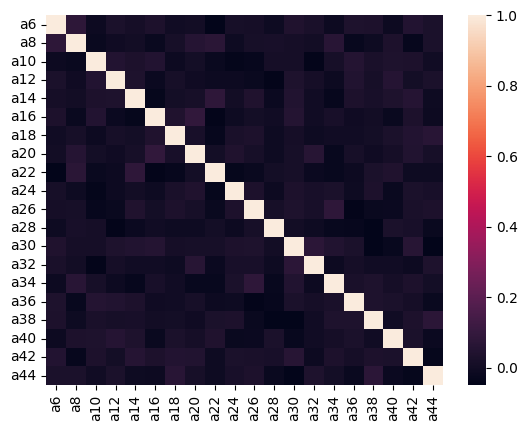

# LOGISTIC REGRESSION

In [86]:
train_X = df.iloc[:1050,1:-1]
train_Y = df.iloc[:1050,-1]

train_X = pd.get_dummies(train_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])

train_X = train_X[['a5_s', 'a5_t', 'a5_d', 'a5_q', 'a6','a7_s', 'a7_t', 'a7_d', 'a7_q', 'a8','a9_s', 'a9_t', 'a9_d', 'a9_q', 'a10','a11_s', 'a11_t', 'a11_d', 'a11_q', 'a12','a13_s', 'a13_t', 'a13_d', 'a13_q', 'a14','a15_s', 'a15_t', 'a15_d', 'a15_q', 'a16','a17_s', 'a17_t', 'a17_d', 'a17_q', 'a18','a19_s', 'a19_t', 'a19_d', 'a19_q', 'a20','a21_s', 'a21_t', 'a21_d', 'a21_q', 'a22','a23_s', 'a23_t', 'a23_d', 'a23_q', 'a24','a25_s', 'a25_t', 'a25_d', 'a25_q', 'a26','a27_s', 'a27_t', 'a27_d', 'a27_q', 'a28','a29_s', 'a29_t', 'a29_d', 'a29_q', 'a30','a31_s', 'a31_t', 'a31_d', 'a31_q', 'a32','a33_s', 'a33_t', 'a33_d', 'a33_q', 'a34','a35_s', 'a35_t', 'a35_d', 'a35_q', 'a36','a37_s', 'a37_t', 'a37_d', 'a37_q', 'a38','a39_s', 'a39_t', 'a39_d', 'a39_q', 'a40','a41_s', 'a41_t', 'a41_d', 'a41_q', 'a42','a43_s', 'a43_t', 'a43_d', 'a43_q', 'a44'
]]

test_X = df.iloc[1050:,1:-1]



test_Y = df.iloc[1050:,-1]

test_X = pd.get_dummies(test_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])

test_X = test_X[['a5_s', 'a5_t', 'a5_d', 'a5_q', 'a6','a7_s', 'a7_t', 'a7_d', 'a7_q', 'a8','a9_s', 'a9_t', 'a9_d', 'a9_q', 'a10','a11_s', 'a11_t', 'a11_d', 'a11_q', 'a12','a13_s', 'a13_t', 'a13_d', 'a13_q', 'a14','a15_s', 'a15_t', 'a15_d', 'a15_q', 'a16','a17_s', 'a17_t', 'a17_d', 'a17_q', 'a18','a19_s', 'a19_t', 'a19_d', 'a19_q', 'a20','a21_s', 'a21_t', 'a21_d', 'a21_q', 'a22','a23_s', 'a23_t', 'a23_d', 'a23_q', 'a24','a25_s', 'a25_t', 'a25_d', 'a25_q', 'a26','a27_s', 'a27_t', 'a27_d', 'a27_q', 'a28','a29_s', 'a29_t', 'a29_d', 'a29_q', 'a30','a31_s', 'a31_t', 'a31_d', 'a31_q', 'a32','a33_s', 'a33_t', 'a33_d', 'a33_q', 'a34','a35_s', 'a35_t', 'a35_d', 'a35_q', 'a36','a37_s', 'a37_t', 'a37_d', 'a37_q', 'a38','a39_s', 'a39_t', 'a39_d', 'a39_q', 'a40','a41_s', 'a41_t', 'a41_d', 'a41_q', 'a42','a43_s', 'a43_t', 'a43_d', 'a43_q', 'a44'
]]

clf = LogisticRegression(random_state=0).fit(train_X, train_Y)

predictions = clf.predict(test_X)

clf.predict_proba(test_X)

/home/darius/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2.92544832e-04, 5.19153953e-05, 2.05167145e-03, ...,
        1.74328419e-10, 1.42059203e-05, 2.43335842e-03],
       [5.11386605e-06, 1.09791270e-03, 3.20068250e-03, ...,
        1.10403409e-17, 9.14026021e-10, 1.88607253e-01],
       [6.28451790e-04, 2.16816643e-05, 3.71529264e-02, ...,
        2.56901794e-06, 1.19890759e-08, 1.12613546e-04],
       ...,
       [8.48164596e-05, 8.44890344e-07, 1.65558439e-03, ...,
        3.19741242e-12, 6.66997469e-10, 5.90756851e-07],
       [2.13484594e-05, 6.58919584e-06, 1.31111378e-04, ...,
        3.75435649e-05, 1.83215503e-03, 1.47799852e-05],
       [2.77428484e-07, 7.94768326e-04, 6.58694489e-06, ...,
        5.08743143e-05, 1.51584163e-14, 4.95051442e-04]])

In [87]:
sns.heatmap(train_X.iloc[.corr())

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2440600259.py, line 1)

In [88]:

accuracy_score(test_Y, predictions)

0.28289473684210525

# KNN

In [68]:
train_X = df.iloc[:1050,1:-1]
train_Y = df.iloc[:1050,-1]

train_X = pd.get_dummies(train_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])



test_X = df.iloc[1050:,1:-1]
test_Y = df.iloc[1050:,-1]

test_X = pd.get_dummies(test_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])



neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(train_X, train_Y)
predictions = neigh.predict(test_X)


In [69]:
accuracy_score(test_Y, predictions)

0.35526315789473684

# DECISION TREE

In [74]:
train_X = df.iloc[:1050,1:-1]
train_Y = df.iloc[:1050,-1]

train_X = pd.get_dummies(train_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])



test_X = df.iloc[1050:,1:-1]
test_Y = df.iloc[1050:,-1]

test_X = pd.get_dummies(test_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_Y)
predictions = clf.predict(test_X)

In [75]:
accuracy_score(test_Y, predictions)

0.28289473684210525

In [29]:
test_X = df.iloc[1050:]


In [30]:
test_X

,ID,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
1050,v2187,t,37.8,t,96.2,t,75.6,q,112.1,t,...,49.1,d,34.1,q,31.4,d,56.2,t,18.3,3c
1051,v1156,t,138.7,d,143.7,q,18.0,t,120.7,q,...,206.2,d,54.8,t,24.9,t,19.0,t,35.2,54c
1052,v1952,t,18.7,q,28.5,d,49.4,q,105.1,s,...,38.2,t,27.9,s,38.0,q,11.6,t,75.7,5c
1053,v761,q,63.3,t,35.2,t,66.0,d,64.7,q,...,46.2,d,32.0,d,45.2,s,51.7,d,125.1,54c
1054,v1836,d,56.2,t,43.0,d,59.1,q,33.0,t,...,33.8,t,18.6,q,108.7,q,21.3,t,35.3,22c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,v501,q,18.8,t,32.5,d,143.1,q,15.7,t,...,172.1,q,62.3,d,36.1,t,27.0,s,38.8,54c
1198,v785,q,60.6,t,29.3,t,38.7,d,47.6,q,...,59.1,s,39.7,d,142.6,q,18.8,d,36.2,54c
1199,v2174,q,166.1,q,62.5,s,34.6,t,37.9,q,...,44.5,d,55.6,d,147.3,q,107.0,t,47.1,52c
1200,v1332,t,36.5,d,46.4,t,27.5,t,35.5,q,...,17.3,t,120.4,q,17.8,d,144.4,t,35.9,54c


In [28]:
train_X

,ID,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a35,a36,a37,a38,a39,a40,a41,a42,a43,a44
0,v1493,t,139.20,q,33.20,d,30.70,d,49.60,t,...,d,134.50,t,24.20,q,14.40,t,42.20,t,18.60
1,v1255,d,144.00,q,66.70,d,46.20,t,32.70,q,...,t,22.40,s,37.70,q,19.70,q,16.50,t,26.60
2,v2194,d,30.70,t,26.80,t,41.20,t,139.30,q,...,t,16.70,t,35.40,q,65.80,s,42.40,d,139.80
3,v2021,t,37.20,t,17.40,q,16.70,s,58.10,t,...,s,33.50,d,44.90,d,56.60,q,20.80,t,36.50
4,v1051,q,12.20,d,154.60,t,18.70,t,37.10,t,...,d,49.50,t,38.80,t,71.40,s,36.80,s,46.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,v256,q,19.90,d,57.10,s,48.70,t,39.90,q,...,t,19.00,t,38.00,t,20.40,t,21.70,t,37.40
1046,v434,q,29.70,d,36.30,t,17.90,t,40.00,t,...,s,32.20,d,42.00,d,43.40,t,34.80,s,36.00
1047,v1021,t,18.59,t,33.86,q,19.87,t,42.15,d,...,s,34.67,t,36.59,s,36.98,t,36.09,q,109.49
1048,v1884,t,18.90,q,8.70,t,22.00,t,138.80,d,...,d,82.90,t,74.90,t,34.50,d,51.40,q,20.10


In [46]:
train_X = df.iloc[:1050,1:-1]
train_Y = df.iloc[:1050,-1]


train_X = pd.get_dummies(train_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])

In [71]:
train_X

,a6,a8,a10,a12,a14,a16,a18,a20,a22,a24,...,a39_s,a39_t,a41_d,a41_q,a41_s,a41_t,a43_d,a43_q,a43_s,a43_t
0,139.20,33.20,30.70,49.60,38.60,39.60,19.9,26.00,21.30,61.00,...,0,0,0,0,0,1,0,0,0,1
1,144.00,66.70,46.20,32.70,19.10,17.70,40.7,120.50,59.20,36.60,...,0,0,0,1,0,0,0,0,0,1
2,30.70,26.80,41.20,139.30,19.80,170.10,173.3,36.00,31.60,38.40,...,0,0,0,0,1,0,1,0,0,0
3,37.20,17.40,16.70,58.10,41.60,78.80,25.5,212.40,68.90,40.10,...,0,0,0,1,0,0,0,0,0,1
4,12.20,154.60,18.70,37.10,79.10,43.30,74.7,39.80,22.80,109.70,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,19.90,57.10,48.70,39.90,13.20,39.50,54.8,177.80,222.10,41.60,...,0,1,0,0,0,1,0,0,0,1
1046,29.70,36.30,17.90,40.00,39.10,34.60,61.5,76.50,35.80,72.70,...,0,0,0,0,0,1,0,0,1,0
1047,18.59,33.86,19.87,42.15,136.11,67.19,52.5,23.08,20.97,149.24,...,1,0,0,0,0,1,0,1,0,0
1048,18.90,8.70,22.00,138.80,126.00,44.20,27.8,39.30,213.00,143.30,...,0,1,1,0,0,0,0,1,0,0


In [79]:
train_X = train_X[['a5_s', 'a5_t', 'a5_d', 'a5_q', 'a6','a7_s', 'a7_t', 'a7_d', 'a7_q', 'a8','a9_s', 'a9_t', 'a9_d', 'a9_q', 'a10','a11_s', 'a11_t', 'a11_d', 'a11_q', 'a12',
'a13_s', 'a13_t', 'a13_d', 'a13_q', 'a14','a15_s', 'a15_t', 'a15_d', 'a15_q', 'a16','a17_s', 'a17_t', 'a17_d', 'a17_q', 'a18','a19_s', 'a19_t', 'a19_d', 'a19_q', 'a20',
'a21_s', 'a21_t', 'a21_d', 'a21_q', 'a22','a23_s', 'a23_t', 'a23_d', 'a23_q', 'a24','a25_s', 'a25_t', 'a25_d', 'a25_q', 'a26','a27_s', 'a27_t', 'a27_d', 'a27_q', 'a28',
'a29_s', 'a29_t', 'a29_d', 'a29_q', 'a30','a31_s', 'a31_t', 'a31_d', 'a31_q', 'a32','a33_s', 'a33_t', 'a33_d', 'a33_q', 'a34','a35_s', 'a35_t', 'a35_d', 'a35_q', 'a36',
'a37_s', 'a37_t', 'a37_d', 'a37_q', 'a38','a39_s', 'a39_t', 'a39_d', 'a39_q', 'a40','a41_s', 'a41_t', 'a41_d', 'a41_q', 'a42','a43_s', 'a43_t', 'a43_d', 'a43_q', 'a44'
]]


In [80]:
train_X

,a5_s,a5_t,a5_d,a5_q,a6,a7_s,a7_t,a7_d,a7_q,a8,...,a41_s,a41_t,a41_d,a41_q,a42,a43_s,a43_t,a43_d,a43_q,a44
0,0,1,0,0,139.20,0,0,0,1,33.20,...,0,1,0,0,42.20,0,1,0,0,18.60
1,0,0,1,0,144.00,0,0,0,1,66.70,...,0,0,0,1,16.50,0,1,0,0,26.60
2,0,0,1,0,30.70,0,1,0,0,26.80,...,1,0,0,0,42.40,0,0,1,0,139.80
3,0,1,0,0,37.20,0,1,0,0,17.40,...,0,0,0,1,20.80,0,1,0,0,36.50
4,0,0,0,1,12.20,0,0,1,0,154.60,...,1,0,0,0,36.80,1,0,0,0,46.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0,0,0,1,19.90,0,0,1,0,57.10,...,0,1,0,0,21.70,0,1,0,0,37.40
1046,0,0,0,1,29.70,0,0,1,0,36.30,...,0,1,0,0,34.80,1,0,0,0,36.00
1047,0,1,0,0,18.59,0,1,0,0,33.86,...,0,1,0,0,36.09,0,0,0,1,109.49
1048,0,1,0,0,18.90,0,0,0,1,8.70,...,0,0,1,0,51.40,0,0,0,1,20.10
